## Project Goal
In this project, i am going to build a model that can predict medical insurance costs in usa based on dataset gotten from <a href="https://www.kaggle.com/mirichoi0218/insurance" target="_blank" rel="noopener" class="gamut-15hd59n-Anchor e14vpv2g0">medical insurance costs dataset</a>

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
insurance = pd.read_csv('insurance.csv')

insurance.head()
# insurance.isnull().sum()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA

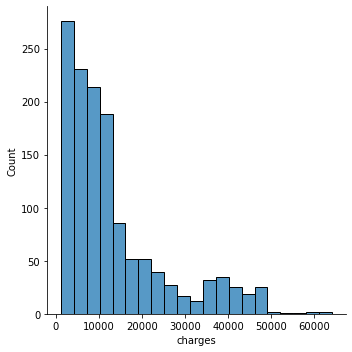

In [29]:
sns.displot(data=insurance, x = 'charges', binwidth = 3000, kind='hist');

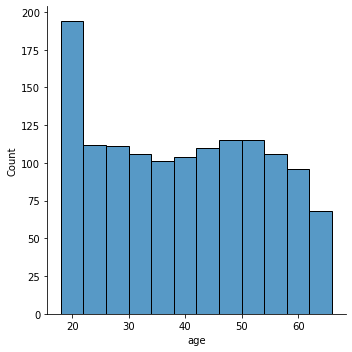

In [30]:
sns.displot(data=insurance, x = 'age', binwidth = 4, kind='hist');

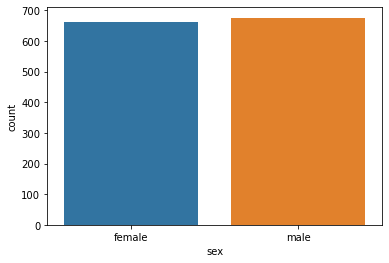

In [23]:
sns.countplot(data=insurance, x = 'sex');

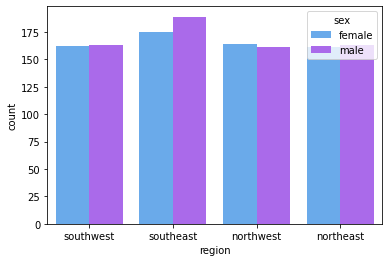

In [37]:
sns.countplot(data=insurance, x = 'region', hue = 'sex', palette = 'cool');

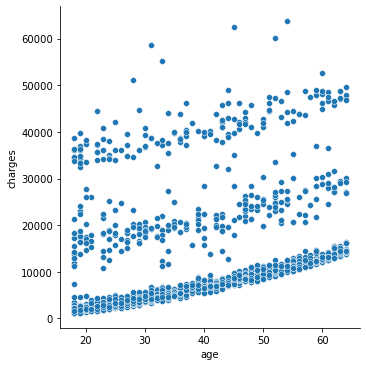

In [31]:
sns.relplot(data=insurance, x = 'age', y = 'charges');

#### Cleaning and scaling the data for modelling

In [89]:
insurance['sex_labels'] = insurance.sex.apply(lambda x: 0 if x == 'male' else 1)
insurance['smoker_labels'] = insurance.smoker.apply(lambda x: 0 if x == 'no' else 1)

labels = LabelEncoder()
insurance['region_labels'] = labels.fit_transform(insurance['region'])

insurance.head()

,age,sex,bmi,children,smoker,region,charges,sex_labels,smoker_labels,region_labels
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,3
1,18,male,33.770,1,no,southeast,1725.55230,0,0,2
2,28,male,33.000,3,no,southeast,4449.46200,0,0,2
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1


In [51]:
insurance.corr()

,age,bmi,children,charges,scaled_age,scaled_bmi,sex_labels,smoker_labels,region_labels
age,1.000000,0.109272,0.042469,0.299008,1.000000,0.109272,0.020856,-0.025019,0.002127
bmi,0.109272,1.000000,0.012759,0.198341,0.109272,1.000000,-0.046371,0.003750,0.157566
children,0.042469,0.012759,1.000000,0.067998,0.042469,0.012759,-0.017163,0.007673,0.016569
charges,0.299008,0.198341,0.067998,1.000000,0.299008,0.198341,-0.057292,0.787251,-0.006208
scaled_age,1.000000,0.109272,0.042469,0.299008,1.000000,0.109272,0.020856,-0.025019,0.002127
scaled_bmi,0.109272,1.000000,0.012759,0.198341,0.109272,1.000000,-0.046371,0.003750,0.157566
sex_labels,0.020856,-0.046371,-0.017163,-0.057292,0.020856,-0.046371,1.000000,-0.076185,-0.004588
smoker_labels,-0.025019,0.003750,0.007673,0.787251,-0.025019,0.003750,-0.076185,1.000000,-0.002181
region_labels,0.002127,0.157566,0.016569,-0.006208,0.002127,0.157566,-0.004588,-0.002181,1.000000


In [96]:
scaler = MinMaxScaler()
data = scaler.fit_transform(insurance[['age', 'bmi', 'children', 'smoker_labels']])

## Building a Model

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(data, insurance['charges'], test_size = 0.1, random_state = 42)

lr = LinearRegression()
lr.fit(x_train, y_train)
print('The slopes:', lr.coef_)

print('Linear Regression model score on test', lr.score(x_test, y_test))


The slopes: [11944.22777311 11652.74731723  2226.60843388 23892.06142254]
Linear Regression model score on test 0.7632788495940077


optimal n value is: {'value': 0.8459532885491463, 'i': 10}


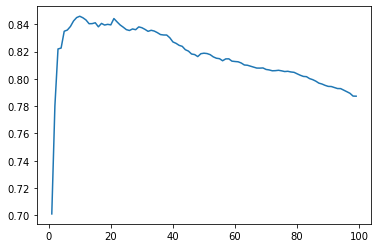

In [83]:
k = []
best = {'value': 0, 'i': 1}
for i in range(1, 100):   
    KNR = KNeighborsRegressor(n_neighbors = i)

    KNR.fit(x_train, y_train)
    score = KNR.score(x_test, y_test)
    k.append(score)
    if score > best['value']:
        best['value'] = score
        best['i'] = i
print('optimal n value is:', best)

plt.plot(range(1,100), k)
plt.show()

In [95]:
KNR = KNeighborsRegressor(n_neighbors = 10)

KNR.fit(x_train, y_train)

print('KNR model score on test', KNN.score(x_test, y_test))

KNR model score on test 0.8459532885491463


## Conclusion
From the models built we see that KNR is the model that had the highest prediction score at 85% and hence will be the preferred model in predicting the continuous insurance costs for future individuals. The model is only as good as its data so the more data entries the better the model works.